In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:

global_seed = 88
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.1,
                      "num_val_benchmarks" : 3,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "GroHess",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 100,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 2,
                "lr" : (5e-5, 2e-3),
                "num_epochs" : (2, 3)}

# Parameters specific to the visualization
visualization_settings = {"savefig" : True,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,}

In [3]:
import sys
import os

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib/benchmark_loaders")

path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
#from HPO_lib.visualization import visualize_HPO, visualize_validation

import importlib

import warnings
warnings.filterwarnings('ignore')

/home/mathis/miniconda3/envs/.jax_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list, model = run_HPO(HPO_settings, method_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-04 18:54:07,212] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1


100%|██████████| 3/3 [00:02<00:00,  1.29it/s]
[I 2024-07-04 18:54:15,578] Trial 0 finished with value: 87.00099762470309 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3}. Best is trial 0 with value: 87.00099762470309.
100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
[I 2024-07-04 18:54:23,335] Trial 1 finished with value: 85.4386223277909 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 3}. Best is trial 0 with value: 87.00099762470309.
  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.54it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.54it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:01<00:00,  1.54it/s]
[I 2024-07-04 18:54:28,253] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2


100%|██████████| 3/3 [00:02<00:00,  1.44it/s]
[I 2024-07-04 18:54:41,842] Trial 0 finished with value: 85.68140142517821 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3}. Best is trial 0 with value: 85.68140142517821.
100%|██████████| 3/3 [00:02<00:00,  1.43it/s]
[I 2024-07-04 18:54:56,065] Trial 1 finished with value: 86.45258907363424 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 3}. Best is trial 1 with value: 86.45258907363424.
  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.44it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.43it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]
[I 2024-07-04 18:55:01,493] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
[I 2024-07-04 18:55:21,587] Trial 0 finished with value: 85.13102137767224 and parameters: {'lr': 0.0013127245462383958, 'num_epochs': 3}. Best is trial 0 with value: 85.13102137767224.
100%|██████████| 3/3 [00:02<00:00,  1.41it/s]
[I 2024-07-04 18:55:42,600] Trial 1 finished with value: 85.17571654790184 and parameters: {'lr': 0.001080265691296867, 'num_epochs': 3}. Best is trial 1 with value: 85.17571654790184.
  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.29it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.29it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.28it/s]


## Visualize results

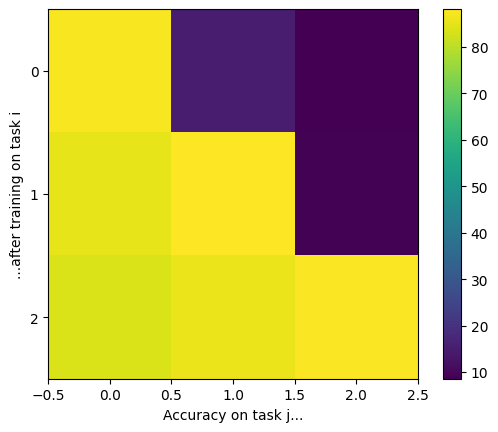

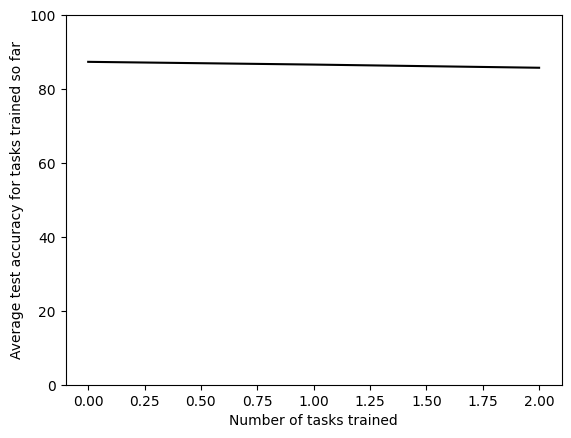

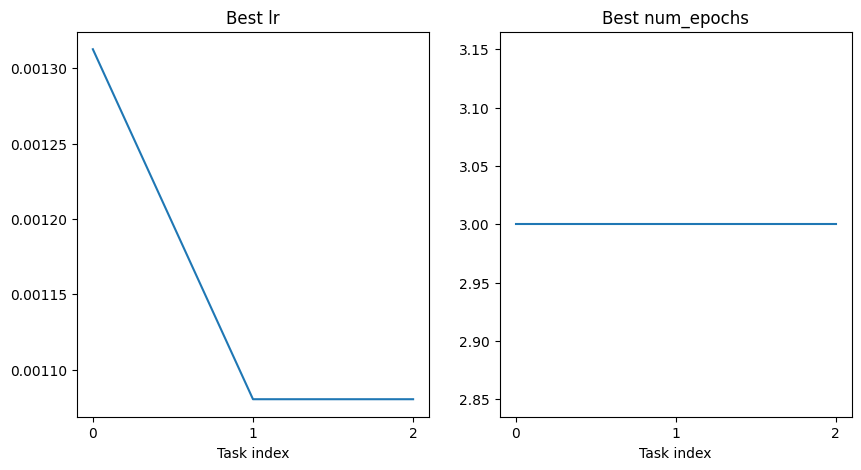

In [8]:
module_name = "HPO_lib.visualize"
module = importlib.import_module(module_name)

for key, boolean in visualization_settings.items() :
    if key != "savefig" :
        visualisation_name = key
        visualisation_function = getattr(module, visualisation_name)
        visualisation_function(test_accs_matrix, best_params_list, HPO_settings, method_settings, benchmark_settings, visualization_settings["savefig"])

## Validate

In [9]:
val_accs_matrix = validate(benchmarks_list, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.35it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.34it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.32it/s]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.29it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.29it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.31it/s]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.32it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.28it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.30it/s]



BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.29it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.29it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.29it/s]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.19it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.29it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.33it/s]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.43it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.43it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]



BENCHMARK 2

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.43it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.43it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.44it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.43it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.43it/s]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.43it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.43it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.42it/s]



BENCHMARK 3

--------------------------------------------------
LEARNING TASK 1


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.39it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.39it/s]



--------------------------------------------------
LEARNING TASK 2


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.36it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.38it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.38it/s]



--------------------------------------------------
LEARNING TASK 3


  0%|          | 0/3 [00:00<?, ?it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 33%|███▎      | 1/3 [00:00<00:01,  1.36it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


 67%|██████▋   | 2/3 [00:01<00:00,  1.37it/s]

In and out sizes :
fc1 : in = 784, out = 100
fc2 : in = 100, out = 100
fc3 : in = 100, out = 10


100%|██████████| 3/3 [00:02<00:00,  1.36it/s]


In [10]:
val_accs_matrix

array([[83.61, 85.87, 87.8 ],
       [83.61, 85.87, 87.8 ],
       [81.97, 85.69, 88.25],
       [84.01, 83.86, 87.7 ]])

In [11]:
test_accs_matrix

array([[87.36, 14.72,  8.57],
       [85.11, 88.13,  9.16],
       [83.61, 85.87, 87.8 ]])